<a href="https://colab.research.google.com/github/mornville/TBBT/blob/master/TBBT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# clone darknet rep
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 13618 (delta 0), reused 0 (delta 0), pack-reused 13615
Receiving objects: 100% (13618/13618), 12.24 MiB | 11.81 MiB/s, done.
Resolving deltas: 100% (9288/9288), done.


In [0]:
# mounting google drive for file transfer
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# # change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile


/content/darknet


In [0]:
# !make


In [0]:
!cp -r gdrive/My\ Drive/YOLOv3/darknet_new/ darknet/

In [0]:
# define helper functions
def imShow(path): 
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(width, height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(10, 5)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# %cd darknet
# !./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg


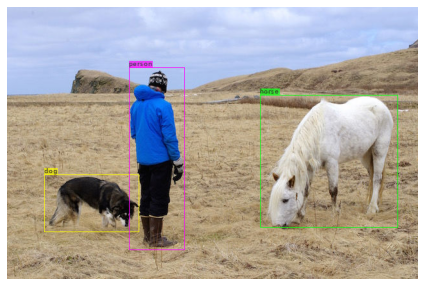

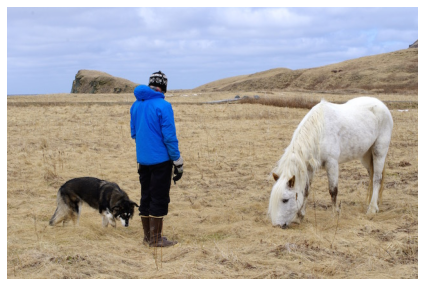

(None, None)

In [0]:
imShow('predictions.jpg'), imShow('data/person.jpg')

In [0]:
# Copying the dataset zip file
!cp gdrive/My\ Drive/obj.zip sample_data/

In [0]:
# Unzipping in darknet/data directory
!unzip sample_data/obj.zip -d darknet/data/ 

In [0]:
%cd darknet/

/content/darknet


In [0]:
# !cp cfg/yolov3.cfg ../gdrive/My\ Drive/YOLOv3/yoloCustomConfig.cfg

In [0]:
# Edited custom config file to darknet/cfg/
!cp ../gdrive/My\ Drive/YOLOv3/yoloCustomConfig.cfg cfg/yolov3Custom12.cfg 

In [0]:
%cd darknet


/content/darknet


In [0]:
!cp ../gdrive/My\ Drive/obj.data data/

In [0]:
!cp ../gdrive/My\ Drive/obj.names ./data

In [0]:
image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
%cd ..

In [0]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

In [0]:
!./darknet detector train data/obj.data cfg/yolov3Custom12.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.529509, GIOU: 0.504451), Class: 0.455543, Obj: 0.575874, No Obj: 0.528275, .5R: 0.500000, .75R: 0.250000, count: 4, class_loss = 327.898621, iou_loss = 0.984100, total_loss = 328.882721 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.487887, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 1101.034180, iou_loss = 0.000000, total_loss = 1101.034180 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.471897, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 4140.880859, iou_loss = 0.000000, total_loss = 4140.880859 

 3: 1859.453857, 1859.665283 avg loss, 0.000000 rate, 21.165710 seconds, 192 images, 33.886177 hours left
Loaded: 0.000052 seconds
v3 (mse loss, Normalizer: (iou: 0.75, 

In [0]:
import os
os.listdir('../gdrive/My Drive/')

[]

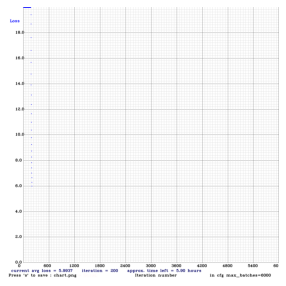

In [0]:
imShow('chart.png')

In [0]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3Custom12.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3Custom12.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [0]:
!./darknet detector test data/obj.data cfg/yolov3Custom12.cfg backup/yolov3Custom12_last.weights ../gdrive/My\ Drive/Kaley\ Cuoco.101.jpg -thresh 0.3


In [0]:
imShow('predictions.jpg')